<a href="https://colab.research.google.com/github/Radityaz/2025_AI_TI1B/blob/main/Riko_AI_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jobsheet 1

##1.	Deteksi Wajah Menggunakan Citra Digital

Image converted to grayscale successfully.


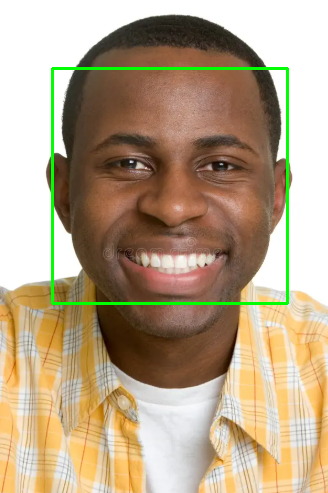

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/smilefellas.png')


if img is None:
  print("Error: Image not loaded. Please check the file path.")
else:
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  print("Image converted to grayscale successfully.")

haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 9)
for (x, y, w, h) in faces_rect:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()





##2.	Deteksi Wajah dan Senyum Menggunakan Citra Digital

--2025-03-15 03:30:07--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.2’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2025-03-15 03:30:07 (15.9 MB/s) - ‘haarcascade_frontalface_default.xml.2’ saved [930127/930127]

--2025-03-15 03:30:07--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

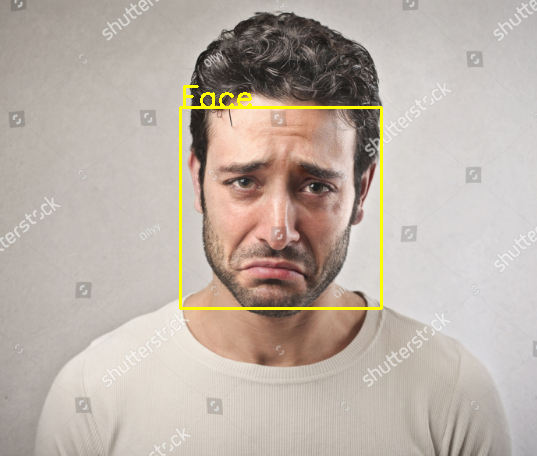

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/Sadfellas.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Update the paths to the downloaded XML files
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

# Use gray_img instead of gray
faces = face_cascade.detectMultiScale(gray_img, 1.1, 9)
print('Number of detected faces:', len(faces))

for (x,y,w,h) in faces:
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
   cv2.putText(img, "Face", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
   roi_gray = gray_img[y:y+h, x:x+w] # Use gray_img for consistency
   roi_color = img[y:y+h, x:x+w]

   smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
   if len(smiles) > 0:
      print("smile detected")
      for (sx, sy, sw, sh) in smiles:
         cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
         cv2.putText(roi_color, "smile", (sx, sy),
         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
   else:
      print("smile not detected")

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##3.	Deteksi Wajah Menggunakan Webcam

In [1]:
import cv2
import datetime

# Load Haar cascades dari OpenCV path
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Coba akses kamera eksternal (1), jika gagal gunakan kamera default (0)
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Kamera eksternal tidak tersedia. Menggunakan kamera default...")
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Kamera tidak terdeteksi!")
    exit()

print("Kamera terdeteksi. Mulai mengambil video...")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Gagal mengambil frame!")
        break

    # Tampilkan video streaming tanpa kotak deteksi
    cv2.imshow("Video Streaming - Tekan 'c' untuk capture", frame)

    # Tombol "c" untuk menangkap gambar dan menganalisisnya
    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(80, 80))

        if len(faces) > 0:
            print(f"{len(faces)} wajah terdeteksi!")
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
                cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

                roi_gray = gray[y:y + h, x:x + w]
                roi_color = frame[y:y + h, x:x + w]

                smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22, minSize=(25, 25))

                for (sx, sy, sw, sh) in smiles:
                    cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)
                    cv2.putText(roi_color, "Smile", (sx, sy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
                    print("Senyum terdeteksi!")

            # Simpan gambar setelah ditandai
            filename = f"captured_face_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.jpg"
            cv2.imwrite(filename, frame)
            print(f"Gambar disimpan: {filename}")

            # Tampilkan gambar hasil scan
            cv2.imshow("Hasil Scan", frame)
            cv2.waitKey(2000)  # Tampilkan selama 2 detik sebelum lanjut
            cv2.destroyWindow("Hasil Scan")
        else:
            print("Tidak ada wajah terdeteksi, gambar tidak disimpan!")

    # Tekan 'q' untuk keluar
    if key == ord('q'):
        break

# Release sumber daya
cap.release()
cv2.destroyAllWindows()



Kamera eksternal tidak tersedia. Menggunakan kamera default...
Error: Kamera tidak terdeteksi!
Kamera terdeteksi. Mulai mengambil video...
Error: Gagal mengambil frame!


##4.mendeteksi wajah dan senyuman secara real-time menggunakan webcam.

In [ ]:
import cv2

# Load the Haar cascade classifiers for face and smile detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

# Initialize camera (0 for default, 1 for external camera)
cap = cv2.VideoCapture(1)

# Check if camera is opened
if not cap.isOpened():
    print("Error: Kamera tidak terdeteksi!")
    exit()

print("Kamera terdeteksi. Mulai mengambil video...")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Gagal mengambil frame!")
        break

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 9)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
        cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect smiles within face region
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        if len(smiles) > 0:
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)
                cv2.putText(roi_color, "Smile", (sx, sy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
            print("Smile detected")
        else:
            print("Smile not detected")

    # Show video stream
    cv2.imshow("Video Streaming - Face & Smile Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
